## DATA COLLECTION

In [1]:
import pitch
import matplotlib.pyplot as plt
import numpy as np

#Size of the pitch in yards (!!!)
pitchLengthX=120
pitchWidthY=80

#ID for Portugal vs Spain Mens World Cup
match_id_required = 7576
home_team_required ="Portugal"
away_team_required ="Spain"

# Load in the data
# I took this from https://znstrider.github.io/2018-11-11-Getting-Started-with-StatsBomb-Data/
file_name=str(match_id_required)+'.json'

#Load in all match events 
 
    
import json
with open('statsbomb_data/events/'+file_name) as data_file:
    #print (mypath+'events/'+file)
    data = json.load(data_file)

    
#get the nested structure into a dataframe 
#store the dataframe in a dictionary with the match id as key (remove '.json' from string)
from pandas import json_normalize
df = json_normalize(data, sep = "_").assign(match_id = file_name[:-5])

## DATA VISUALIZATION

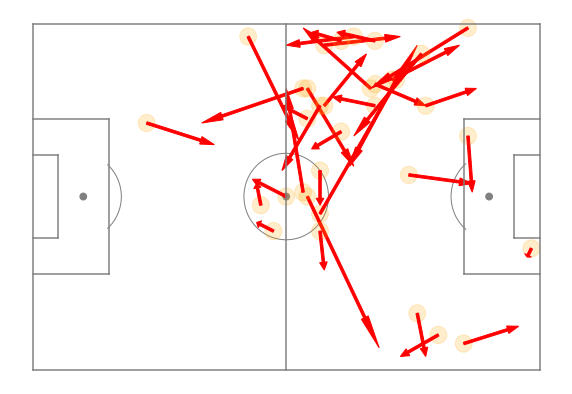

In [16]:
#Find the passes
passes = df.loc[df['type_name'] == 'Pass'].set_index('id')
#Draw the pitch
from pitch import createPitch
(fig,ax) = createPitch(pitchLengthX,pitchWidthY,'yards','gray')
for i,thepass in passes.iterrows():
    #if thepass['team_name']==away_team_required: #plotting all the passes of the team 
    if thepass['player_name']=='Cristiano Ronaldo dos Santos Aveiro':
        x=thepass['location'][0]
        y=thepass['location'][1]
        passCircle=plt.Circle((x,pitchWidthY-y),2,color="orange")      
        passCircle.set_alpha(.2)   
        ax.add_patch(passCircle)
        dx=thepass['pass_end_location'][0]-x
        dy=thepass['pass_end_location'][1]-y

        passArrow=plt.Arrow(x,pitchWidthY-y,dx,-dy,width=3,color="red")
        ax.add_patch(passArrow)

fig.set_size_inches(10, 7) 
plt.show()